# Project Euler Solutions

## PROBLEM 1

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

### ANSWER:

In [1]:
def prob_1(limit):
    # Initialize variables
    total = 0
    
    # Run through all numbers below limit
    for num in range(limit):

        # Check if the number is a multiple of 3 or 5
        if (num % 3 == 0) or (num % 5 == 0):

            # Add number to total
            total += num
    
    return total
        
print(prob_1(1000))

# Check
print(prob_1(10))

233168
23


## PROBLEM 2

Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

### ANSWER:

In [2]:
def prob_2(limit):
    # Initialize variables
    total = 2   # Account for the number 2 beforehand
    fib_1 = 1
    fib_2 = 2
    fib = fib_1 + fib_2
    
    # Run through all numbers below limit
    while fib < limit:
        
        # Generate next Fibonacci number
        fib = fib_1 + fib_2
        
        # Check if the number is even
        if (fib % 2 == 0):
            
            # Add number to total
            total += fib
        
        # Update fib_1 and fib_2
        fib_1 = fib_2
        fib_2 = fib
    
    return total
        
print(prob_2(4e6))

# Check
print(prob_2(89))

4613732
44


## PROBLEM 3

The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

### ANSWER:

For this problem, we start with a prime number and iteratively divide the given number with the prime. If the remainder is now nonzero, we add one to the prime number and repeat the steps from before. In this case, we will run through some nonprime numbers (for example, 6) but because we will have already divided the given number by the preceding primes (for example, 2 and 3), they will be of no consequence. We continue this until we get 1. 

In [3]:
def prob_3(limit):
    # Initialize variables
    prime = 2       
    
    # Run through all numbers below limit
    while limit != 1:
        
        # Divide the given number by prime for as long as the remainder is zero. Else, add 1 to prime.
        while limit % prime == 0:
            limit /= prime
        
        prime += 1
        
    return prime - 1   # Return the last prime for which the remainder is zero (i.e., prime before we added 1.)
        
print(prob_3(600851475143))

# Check
print(prob_3(13195))

6857
29


## PROBLEM 4:
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

### ANSWER:

For this problem, we have to use a nested for loop. We run through all three-digit numbers (starting with the largest ones) and multiply them until we hit a palindrome number. We check if it is a palindrome number through a helper function, implemented below.

In [4]:
def is_palindrome(num):
    # Convert number to string
    num = str(num)
    
    # Check if num is a palindrome (using recursion)
    if num == "":
        return True
    else:
        return num[0] == num[-1] and is_palindrome(num[1:-1])

In [5]:
def prob_4(upper, lower):
    # Run through all numbers (lower inclusive)
    for i in range(upper, lower - 1, -1):
        for j in range(upper, lower - 1, -1):

            # Check if product is a palindrome number
            if is_palindrome(i * j):
                print("{} * {} = {}".format(i, j, i * j))
                break     # Break out of inner loop

        if is_palindrome(i * j):
            break    # Break out of outer loop
            
prob_4(999, 100)

# Check
prob_4(99, 10)

995 * 583 = 580085
99 * 91 = 9009


## PROBLEM 5:

2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

### ANSWER:

In this problem, we can initialize the product and go iteratively from numbers 1 to 20, checking if the product is perfectly divisible by the number. If not, we multiply the product by the number.

This works fine if the number is prime or if it is the product of two different primes (e.g., 6 is fine because we will already have run through 2 and 3, so the product should now be perfectly divisible by 6). If the product is a perfect square, cube, fourth..., etc. , however, we will run into problems. 

Using 4 as an example, the product we'll have so far will have the factors 2 and 3. Thus, to get the SMALLEST positive number, we only need to multiply by 2 (not by 4), so that the product will now have the factors 2, 3 and 2 (or 4 and 3). The same goes with the other perfect squares, cubes, fourths..., etc. Thus, if the number is a perfect square, cube, fourth..., etc. , we only multiply the product with its square/cube/fourth/...etc. root, respectively.

So that the code works for numbers beyond 20, we need to check if the range of numbers contains a perfect fifth, sixth..., etc. To do this, we compute for the fifth, sixth..., etc. root of the smallest number (2) and check if it is within the range of numbers given. If it is, we also test for perfect fifths, sixths,... etc.

In [6]:
def prob_5(limit):
    # Initialize variables
    prod = 1
    exp = 2
    exp_list = []
    
    # Check if we need to account for perfect squares, cubes, fourths, fifths, etc... 
    while 2 ** exp <= limit:
        exp_list.append(exp)
        exp += 1
        
    for num in range(2, limit):
        # Initialize flag variable - 0 if not done and 1 if done
        flag = 0
        
        # Check if number is perfectly divisible by i
        if prod % num == 0:
            flag = 1
        else:
            # If the number is a perfect square/cube/fourth, multiply by its square/cube/fourth root.
            for exp in exp_list[::-1]:         # Reverse list so that we check in reverse order
                if num ** (1 / exp) - round(num ** (1 / exp)) == 0 and flag == 0:
                    prod *= num ** (1 / exp)
                    flag = 1
            
            # If flag is still 0, multiply prod by the entire number
            if flag == 0:
                prod *= num   
    return prod

print(prob_5(20))

# Check 
print(prob_5(10))

# Check if it works for higher numbers
print(prob_5(40))

232792560.0
2520.0
5342931457063200.0


## PROBLEM 6

The sum of the squares of the first ten natural numbers is,
$\begin{equation}
1^{2} + 2^{2} + \ldots + 10^{2} = 385
\end{equation}$

The square of the sum of the first ten natural numbers is,
$\begin{equation}
(1 + 2 + \ldots + 10)^{2} = 55^{2} = 3025
\end{equation}$

Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is $3025 − 385 = 2640$.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

### ANSWER:

In this case, it is easier to just run through all the numbers and take their sum squared and the sum of their squares.

In [7]:
def prob_6(limit):
    # Initialize variables
    total_sq = 0
    total = 0
    
    # Run through all numbers up to limit
    for num in range(limit + 1):
        total += num
        total_sq += num ** 2
    
    # Get difference
    return total ** 2 - total_sq

print(prob_6(100))

# Check
print(prob_6(10))

25164150
2640


## PROBLEM 7:
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

### ANSWER:

In this case, we run through all the numbers and divide them by the preceding numbers. If there are no such numbers for which the remainder is zero, the number is prime. We use a counter to keep track of all the primes

There is a more efficient algorithm called the sieve of Eratosthenes. The algorithm allows us to identify all prime numbers below some number $n$. Because we do not want to guess where the 10,001th prime is, we just stick with this less efficient algorithm. 

In [8]:
def prob_7(num):
    # Initialize variables
    count = 1
    i = 2
    
    # Find prime number 2 up to limit
    while count < num:
        # Initialize flag variable - 0 if not prime and 1 otherwise
        flag = 1
        
        # Add 1 to i
        i += 1
        
        # Run through all preceding numbers 
        for j in range(2, i):
            
            # If the remainder is zero, flag the number as non-prime
            if i % j == 0:
                flag = 0
                break
        
        # If flag is still 1, increase the prime count by 1 
        if flag == 1:
            count += 1
            
    return i

print(prob_7(10001))

# Check
print(prob_7(6))

104743
13


## PROBLEM 8
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

Find the thirteen adjacent digits in the following 1000-digit number that have the greatest product. What is the value of this product?

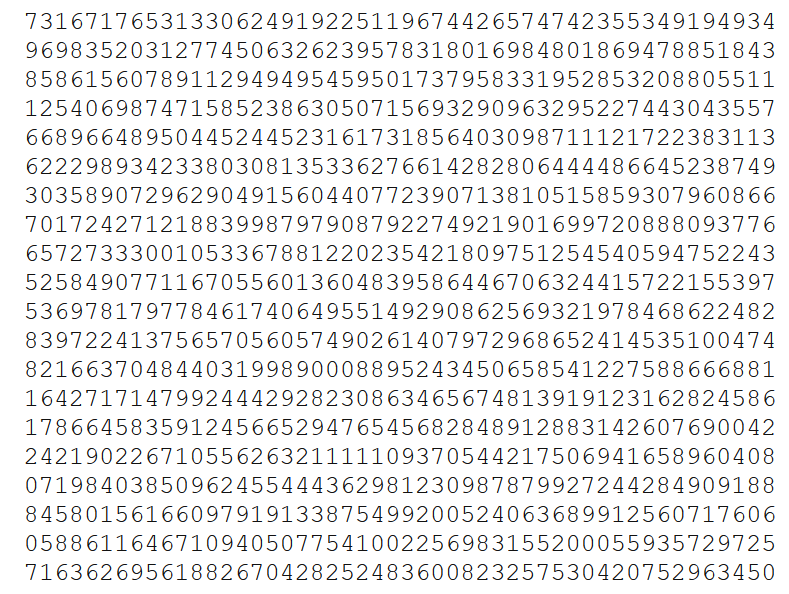

### ANSWER:

We treat the number as a string and run through every $n$ numbers. For every 13 numbers, we get the product and compare with the maximum product thus far.

In [9]:
def prob_8(ndig):
    # Initialize variables
    num = ""
    max_prod = 1

    # Open file
    f = open("Problem 8.txt", "r")

    for line in f:
        # Remove newline
        line = line.strip()

        # Add to num
        num += line
       
    # Run through every group of ndig digits in num
    for i in range(len(num) - ndig):
        # Initialize product
        prod = 1
        num_grp = num[i: i + ndig]
        
        # Run through every digit in the group
        for j in range(ndig):
            prod *= int(num_grp[j])
        
        # Check if prod is greater than max_prod
        if prod > max_prod:
            max_prod = prod
        
    return max_prod

print(prob_8(13))

# Check
print(prob_8(4))

23514624000
5832


## PROBLEM 9

A Pythagorean triplet is a set of three natural numbers, $a < b < c$, for which,
$\begin{equation}
a^{2} + b^{2} = c^{2}
\end{equation}$

For example, $32 + 42 = 9 + 16 = 25 = 52$.

There exists exactly one Pythagorean triplet for which $a + b + c = 1000$.
Find the product $abc$.

### ANSWER:

As with earlier, we simply run through every two numbers $a$ and $b$ and consider only the triplets for which $c = \sqrt{a^{2} + b^{2}}$ is an integer. These will be the Pythagorean triplets. Once we determine that the group of numbers is a Pythagorean triplet, we check if the sum is equal to 1000. If it is, we get the product of the numbers in that triplet.

To find a good estimate for the extent of our search space, we set $a = b$ and compute. Using algebra, we find that $a = b \approx 293$, so we search from 1 to 293 for a. If we set $a = 1$, using algebra and some guesswork, we find that $b \approx 500$, so we search from 293 to 500 for b. Implementing this in code,

In [10]:
# Run through the search space
for a in range(1, 293):
    for b in range(500, 292, -1):
        
        # Find c and fractional part of c
        c = (a**2 + b**2) ** (1 / 2)
        c_frac = c - int(c)
        
        # If c is an integer, find if the sum of the triplet is equal to 1000
        if c_frac == 0:
            if a + b + c == 1000:
                print("{} * {} * {} = {}".format(a, b, c, a * b * c))
                break

200 * 375 * 425.0 = 31875000.0


## PROBLEM 10

The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

### ANSWER:

For this problem, we employ the sieve of Eratosthenes, as mentioned earlier. The algorithm is as follows.

1. Enumerate all $n$ numbers.
2. We start with the smallest prime $p = 2$. 
3. Starting from $p^{2}$, we iteratively eliminate all numbers in increments of $p$. That is, we eliminate $p^{2} + p$, $p^{2} + 2p$, $p^{2} + 3p$, and so on.
4. We check for the greatest number greater than $p$ that had not been eliminated. This number now becomes our new $p$.

This process repeats until $p^{2}$ is greater than $n$ because in this case, there would be nothing to eliminate. 

In [11]:
def prob_10(limit):
    # Initialize variables
    prime = [True for i in range(limit)]
    p = 2
    
    # Set values for 0, 1 and 2
    prime[0] = False
    prime[1] = False
    prime[2] = True
    
    # Implement sieve of Eratosthenes.
    while p ** 2 <= limit:
        
        # If p is prime
        if prime[p]:
            # Starting from p**2 in increments of p
            for i in range(p ** 2, limit, p):
                prime[i] = False
        
        # Update p
        p += 1
    
    return sum([idx for idx, val in enumerate(prime) if val])

print(prob_10(2000000))

# Check
print(prob_10(10))

142913828922
17


## PROBLEM 11

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

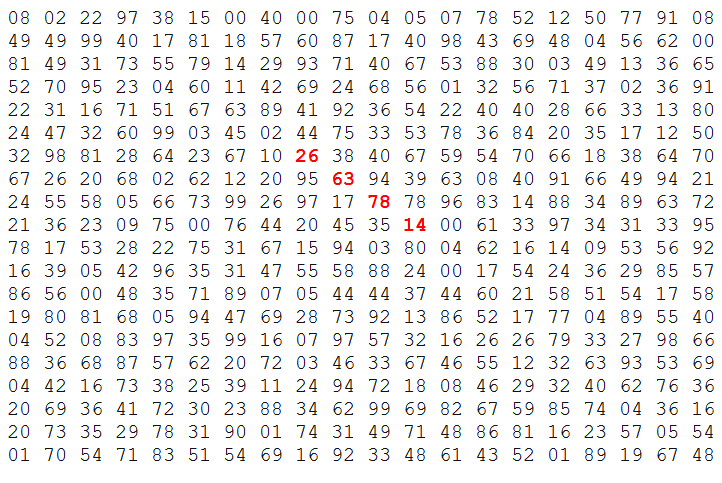

The product of these numbers is $26 × 63 × 78 × 14 = 1788696$.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

### ANSWER:

We search through all possible four-number combinations in the grid until we get the largest product.

In [12]:
# Initialize variables
max_prod = 1
size = 20
row = 0

# Initialize array
mat = [[[] for j in range(size)] for i in range(size)]
for i in range(size):
    for j in range(size):
        mat[i][j] = 0

# Open file
f = open("Problem 11.txt", "r")

# Read lines
for line in f:
    # Remove newline
    num_list = line.strip()
    
    # Get numbers
    num_list = line.split(" ")
    
    # Convert strings to ints
    num_list = list(map(lambda x: int(x), num_list))
    
    # Place nums in array
    for col in range(len(num_list)):
        mat[row][col] = num_list[col]
    
    # Update row for next line
    row += 1
    
# Search every 4-number combination in the rows and columns simultaneously
for i in range(size - 3):
    for j in range(size - 3):
        row_prod = mat[i][j] * mat[i][j + 1] * mat[i][j + 2] * mat[i][j + 3]
        col_prod = mat[j][i] * mat[j + 1][i] * mat[j + 2][i] * mat[j + 3][i]
        
        if max(row_prod, col_prod) > max_prod:
            max_prod = max(row_prod, col_prod)

# Search every 4-number combination in the diagonals
for i in range(3, 20):
    for j in range(i - 3):
        diag_prod_1 = mat[i][j] * mat[i - 1][j + 1] * mat[i - 2][j + 2] * mat[i - 3][j + 3]
        diag_prod_2 = mat[i][(size - 1) - j] * mat[i - 1][(size - 1) - (j + 1)] * mat[i - 2][(size - 1) - (j + 2)] * mat[i - 3][(size - 1) - (j + 3)]
        
        if max(diag_prod_1, diag_prod_2) > max_prod:
            max_prod = max(diag_prod_1, diag_prod_2)

print(max_prod)

70600674


## PROBLEM 12

The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be $1 + 2 + 3 + 4 + 5 + 6 + 7 = 28$. The first ten terms would be:

$\begin{equation}
1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...
\end{equation}$

Let us list the factors of the first seven triangle numbers:

$1: 1$

$3: 1,3$

$6: 1,2,3,6$

$10: 1,2,5,10$

$15: 1,3,5,15$

$21: 1,3,7,21$

$28: 1,2,4,7,14,28$

We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

### ANSWER:

We use a helper function to list down the factors of a given number. In this function, we run from 1 to the square root of the given number. Notice from the list of factors that the leftmost and the rightmost factors/the second leftmost and second rightmost factors/etc. when multiplied produce the given number. As such, we only need to produce the factors before the square root of the given number and we can get the rest of the factors by dividing the given number by the factors.

We then run through all triangular numbers until we get one with more than 500 factors.

In [13]:
def factors(num):
    factor_list = []
    
    # Account for 0
    if num == 0:
        return factor_list
    
    # Run from 1 to the floor of the square root of the number.
    for i in range(1, int(num ** (1 / 2)) + 1):
        
        # Include in list of factors if it perfectly divides num
        if num % i == 0:
            factor_list.append(i)
            factor_list.append(int(num / i))
            
    # Remove any duplicates
    factor_list = list(set(factor_list))
        
    # Sort the elements
    factor_list = sorted(factor_list)
    
    return factor_list

In [14]:
def prob_12(limit):
    # Initialize variables
    tri_num = 1
    to_add = 2

    while len(factors(tri_num)) <= limit:
        tri_num += to_add
        to_add += 1
        
    return tri_num

print(prob_12(500))

# Check
print(prob_12(5))

76576500
28


## PROBLEM 13

Work out the first ten digits of the sum of the one-hundred 50-digit numbers stored in Problem 13.txt.

### ANSWER:

In [15]:
# Initialize variables
total = 0

# Open file
f = open("Problem 13.txt", "r")

for line in f:
    total += int(line)

print(str(total)[:10])

5537376230


## PROBLEM 14
The following iterative sequence is defined for the set of positive integers:

$n → \frac{n}{2}$ (n is even)

$n → 3n + 1$ (n is odd)

Using the rule above and starting with 13, we generate the following sequence:
$13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1$

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.

### ANSWER:

We use the helper function `collatz` to generate the Collatz sequence given a starting number. We then run from 1 to one million, to check which starting number generates the longest chain.

In [16]:
def collatz(num):
    # Initialize the variables
    collatz_seq = []
    
    while True:
        # Generate the sequence
        if num % 2 == 0:
            num /= 2
        else:
            num = num * 3 + 1

        # Include new number in sequence
        collatz_seq.append(num)

        # Stop if the sequence reaches 1
        if num == 1:
            break
    
    return collatz_seq

In [17]:
def prob_14(limit):
    # Initialize the variables
    max_len = 1
    max_num = 1
    
    # Run through all numbers
    for i in range(1, limit):
        if len(collatz(i)) > max_len:
            max_len = len(collatz(i))
            max_num = i
            
    return max_num

print(prob_14(1000000))

837799


## PROBLEM 15

Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

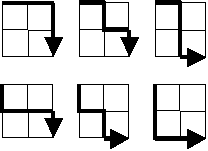

How many such routes are there through a 20×20 grid?

### ANSWER:

Finding a route is analogous to forming a sequence with 2 rights (R's) and 2 downs (D's). For example, the first route is analogous to the sequence RRDD. The problem then is reduced to counting the number of possible sequences with 2 R's and 2 D's. Using combinatorics, this is just $\frac{4!}{2! 2!}$ = 6.

Extending this to thew 20x20 grid case, we just need to count the number of possible sequences with 20 R's and 20 D's, which is $\frac{40!}{20! 20!}$. We use the helper function `factorial` to help us compute this.

In [18]:
def factorial(num):
    if num == 0 or num == 1:
        return 1
    else:
        return num * factorial(num - 1)

In [19]:
def prob_15(num):
    # Compute for the number of all possible routes 
    num_routes = factorial(2 * num) / (factorial(num) * factorial(num))
    
    return num_routes

print(prob_15(20))

# Check
print(prob_15(2))

137846528820.0
6.0


## PROBLEM 16
$2^{15} = 32768$ and the sum of its digits is $3 + 2 + 7 + 6 + 8 = 26$.

What is the sum of the digits of the number $2^{1000}$?

### ANSWER:

In [20]:
# Initialize variables
num = 2 ** 1000
total = 0

# Convert to string
num = str(num)

for digit in num:
    total += int(digit)
    
print(total)

1366


## PROBLEM 17

If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?

NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.

### ANSWER:

We first need to convert the numbers into words using a dictionary. Here we will use a helper function `num_to_word`. Since we will only need to convert the numbers 1 up to one thousand into words, we will only consider these numbers in the helper function.

In [21]:
def num_to_word(num):
    # Initialize variables
    num_str = ""
    
    # Initialize dictionaries
    ones_dict = {0: "", 1: "one", 2: "two", 3: "three", 4: "four", 5: "five", 6: "six", 7: "seven", 8: "eight", 9: "nine"}
    tens_dict = {0: "", 1: "ten", 2: "twenty", 3: "thirty", 4: "forty", 5: "fifty", 6: "sixty", 7: "seventy", 8: "eighty", 9: "ninety"}
    
    # Convert number to string
    num = str(num)
    
    # Start conversion from ones digit to last digit
    for pos in range(len(num[::-1])):
        digit = int(num[::-1][pos])
        
        # Add ones digit
        if pos == 0:
            num_str += ones_dict[digit]
        
        # Add tens digit
        if pos == 1:
            num_str = tens_dict[digit] + num_str
        
        # Add hundreds digit
        if pos == 2 and digit != 0:
            num_str = ones_dict[digit] + "hundredand" + num_str
            
        # Add thousands digit
        if pos == 3 and digit != 0:
            num_str = ones_dict[digit] + "thousand" + num_str
    
    return num_str

In [22]:
def prob_17(limit):
    # Initialize variable
    num_str = ""
    
    # Run through all numbers up until limit
    for num in range(limit + 1):
        num_str += num_to_word(num)
        
    return len(num_str)

print(prob_17(1000))

# Check
print(prob_17(5))

21111
19


## PROBLEM 18
By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.

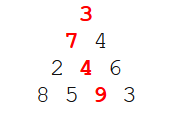

That is, $3 + 7 + 4 + 9 = 23$.

Find the maximum total from top to bottom of the triangle below:

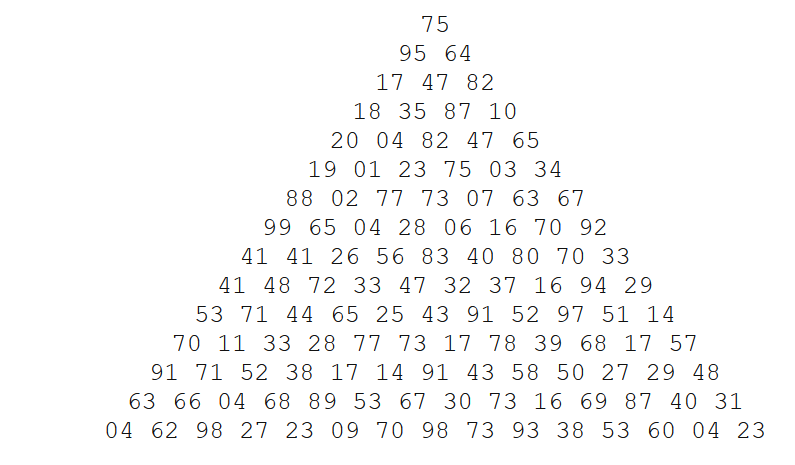

NOTE: As there are only 16384 routes, it is possible to solve this problem by trying every route. However, Problem 67, is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)

### ANSWER:

We get the maximum total by forming a route to the bottom row, only selecting the larger of the two adjacent numbers. 

In [23]:
# Initialize variables
total = 0
start = True

# Open file
f = open("Problem 18.txt", "r")

# Read lines
for line in f:
    # Remove newline
    line = line.strip()
    
    # Split based on spaces
    line = line.split(" ")
    
    # Convert all strings to ints
    line = list(map(lambda x: int(x), line))
    
    # Add number in first line to total
    if start:
        idx = 0
        total += line[idx]
        start = False
    
    # Choose between two adjacent numbers
    else:
        if line[idx] > line[idx + 1]:
            total += line[idx]
        else:
            total += line[idx + 1]
            idx += 1

print(total)

1064


In [24]:
# Check
# Initialize variables
total = 0
start = True

# Open file
f = open("Problem 18 Ex.txt", "r")

# Read lines
for line in f:
    # Remove newline
    line = line.strip()
    
    # Split based on spaces
    line = line.split(" ")
    
    # Convert all strings to ints
    line = list(map(lambda x: int(x), line))
    
    # Add number in first line to total
    if start:
        idx = 0
        total += line[idx]
        start = False
    
    # Choose between two adjacent numbers
    else:
        if line[idx] > line[idx + 1]:
            total += line[idx]
        else:
            total += line[idx + 1]
            idx += 1

print(total)

23


## PROBLEM 19

You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, <br>
April, June and November. <br>
All the rest have thirty-one, <br>
Saving February alone, <br>
Which has twenty-eight, rain or shine. <br>
And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

### ANSWER:

We know from the information that 7 Jan 1900 is a Sunday, so we start with that. We run through each Sunday, taking note of the month, day and year and changing the values whenever necessary. We use a helper function `is_leapyear` to tell whether a year is a leap year or not.

In [25]:
def is_leapyear(year):
    if year % 4 == 0:
        if year % 100 == 0 and year % 400 != 0:
            return False
        else:
            return True
    else:
        return False

In [26]:
# Initialize variables
sunday_count = 0

# Initialize date variables
month = 1
day = 7
year = 1900

if is_leapyear(year):
    month_dict = {1: 31, 2: 29, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
else:
    month_dict = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

    
# Run through all Sundays from 1900 to 2000
while year <= 2000:
    day += 7

    # Change month, day and year depending on the value of day.
    if day > month_dict[month] and month < 12:
        day -= month_dict[month]
        month += 1
    elif day > month_dict[month] and month == 12:
        day -= month_dict[month]
        month = 1
        year += 1
    
    # Update Sunday count
    if day == 1 and year != 1900:
        sunday_count += 1

print(sunday_count)

171


## PROBLEM 20
$n!$ means $n × (n − 1) × ... × 3 × 2 × 1$

For example, $10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800$, and the sum of the digits in the number $10!$ is $3 + 6 + 2 + 8 + 8 + 0 + 0 = 27$.

Find the sum of the digits in the number $100!$

### ANSWER:

This is straightforward. We use the function `factorial` from earlier.

In [27]:
# Initialize variables
num = factorial(100)
total = 0

# Convert num to string
num = str(num)

# Run through all digits
for digit in num:
    total += int(digit)
    
print(total)    

648


## PROBLEM 21 

Let $d(n)$ be defined as the sum of proper divisors of $n$ (numbers less than $n$ which divide evenly into $n$).
If $d(a) = b$ and $d(b) = a$, where $a \neq b$, then $a$ and $b$ are an amicable pair and each of $a$ and $b$ are called amicable numbers.

For example, the proper divisors of 220 are 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 and 110; therefore $d(220) = 284$. The proper divisors of 284 are 1, 2, 4, 71 and 142; so $d(284) = 220$.

Evaluate the sum of all the amicable numbers under 10000.

### ANSWERS:

We search through all numbers under 10000 and find the sum of their proper factors using the helper function `proper_factors`, a modified version of the `factors` function from earlier. We then check the factors of the sum, sum them up and check if it is equal to the original number. If it is, the pair of numbers is amicable. We then take note of the sum of these amicable numbers.

In [28]:
def proper_factors(num):
    factor_list = []
    
    # Account for 0
    if num == 0:
        return factor_list
    
    # Run from 1 to the floor of the square root of the number.
    for i in range(1, int(num ** (1 / 2)) + 1):
        
        # Include in list of factors if it perfectly divides num
        if num % i == 0:
            factor_list.append(i)
            factor_list.append(int(num / i))
            
    # Remove any duplicates
    factor_list = list(set(factor_list))
    
    # Remove the original number
    factor_list.remove(num)
    
    # Sort the elements
    factor_list = sorted(factor_list)
    
    return factor_list

In [29]:
# Initialize variables
total = 0
amicable = []

# Run through all numbers under 10000
for a in range(10000):
    b = sum(proper_factors(a))
    if sum(proper_factors(b)) == a and a != b and a not in amicable and b not in amicable:
        total += a + b
        amicable.extend([a, b])

print(total)

31626


## PROBLEM 22

Using Problem 22.txt, a 46K text file containing over five-thousand first names, begin by sorting it into alphabetical order. Then working out the alphabetical value for each name, multiply this value by its alphabetical position in the list to obtain a name score.

For example, when the list is sorted into alphabetical order, COLIN, which is worth 3 + 15 + 12 + 9 + 14 = 53, is the 938th name in the list. So, COLIN would obtain a score of 938 × 53 = 49714.

What is the total of all the name scores in the file?

### ANSWER:

In [30]:
# Initialize variables
alphabet = ",ABCDEFGHIJKLMNOPQRSTUVWXYZ" # Add "," so that alphabet[1] = 'A'
total = 0

# Open file
f = open("Problem 22.txt", "r")
name_list = f.readline()

# Separate names
name_list = name_list.split('"')

# Remove punctuation
name_list = list(filter(lambda x: x != "," and x != "", name_list)) 

# Sort names by alphabetical order
name_list.sort()

# Get score for each name
for i in range(len(name_list)):
    # Initialize variables
    score = 0
    name = name_list[i]
    
    # Get alphabetical value for each name
    for letter in name:
        score += alphabet.find(letter)
    
    # Multiply by position in name_list
    score *= i + 1
    
    # Add score to total
    total += score

print(total)

871198282


## PROBLEM 23

A perfect number is a number for which the sum of its proper divisors is exactly equal to the number. For example, the sum of the proper divisors of 28 would be $1 + 2 + 4 + 7 + 14 = 28$, which means that 28 is a perfect number.

A number $n$ is called deficient if the sum of its proper divisors is less than $n$ and it is called abundant if this sum exceeds $n$.

As 12 is the smallest abundant number, $1 + 2 + 3 + 4 + 6 = 16$, the smallest number that can be written as the sum of two abundant numbers is 24. By mathematical analysis, it can be shown that all integers greater than 28123 can be written as the sum of two abundant numbers. However, this upper limit cannot be reduced any further by analysis even though it is known that the greatest number that cannot be expressed as the sum of two abundant numbers is less than this limit.

Find the sum of all the positive integers which cannot be written as the sum of two abundant numbers.

### ANSWER:

We search through all numbers below 28,123 for abundant numbers using the helper function `proper_factors`. Once we have all abundant numbers, we add each one to all the abundant numbers already on record to get all the possible sums of abundant number pairs. We then get the symmetric difference of the set of all positive integers below 28123 (given by `range(1, 28123)`) and the set of all possible sums of abundant number paits to get the answer.

In [31]:
# Initialize variables
abundant = []
sum_abundant = []

# Run through all numbers up below 28,123 to get abundant numbers
for i in range(1, 28123):
    if sum(proper_factors(i)) > i: 
        abundant.append(i)
        
# Get all possible sums of abundant number pairs
for i in range(len(abundant)):
    for j in range(len(abundant)):
        sum_abundant.append(abundant[i] + abundant[j])
        
# Get sum of all positive integers that cannot be written as the sum of two abundant numbers
sum(set(range(1, 28123)).symmetric_difference(set(sum_abundant)))

1141894349

## PROBLEM 24:
A permutation is an ordered arrangement of objects. For example, 3124 is one possible permutation of the digits 1, 2, 3 and 4. If all of the permutations are listed numerically or alphabetically, we call it lexicographic order. The lexicographic permutations of 0, 1 and 2 are: 012, 021, 102, 120, 201, 210

What is the millionth lexicographic permutation of the digits 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9?

### ANSWER:

There are $10! = 3,628,800$ possible permutations of the digits 0 - 9. Of these, there are $9! = 362,880$ permutations where the first digit is 0, 362,880 where the first digit is 1, and so on. Note that $1 + 2(9!) \leq 1,000,000 \leq 1 + 3(9!)$. Since the order is lexicographic, the greatest permutation with 1 as the first digit is in the 1 + 2(9!)th place and the greatest permutation with 2 as the first digit is in the 1 + 3(9!)th place. Thus, the millionth permutation most likely has 2 as its first digit.

Further drilling down, there are $8! = 40,320$ permutations where the first digit is 1 and the second digit is 0, 40,320 permutations where the first digit is 1 and the second digit is 2, and so on. Note that $1 + 2(9!) + 6(8!) \leq 1,000,000 \leq 1 + 2(9!) + 7(8!)$. Again, since the order is lexicographic, the permutation in the $(1 + 2(9!) + 6(8!))th$ place is the greatest permutation with 2 as the first digit and 6 as the second digit (we cannot repeat digits) and the permutation in the $(1 + 2(9!) + 7(8!))th$ place is the greatest permutation with 2 as the first digit and 7 as the second digit. Thus, the millionth permutation most likely has 7 as its second digit.

We can continue along this line of thinking and find the solution by hand, but we will implement it instead via code. We go from 9! to 1! and find how much of each one we can add to get as close to (but less than) 1,000,000. After we find this number $n$, we select the $(n+1)$-th digit from the list 0-9, removing numbers that we have already used up.

In [32]:
def prob_24(order):
    # Initialize variables
    digits = list("0123456789")
    n = 9
    total = 1
    num = []

    while n >= 1:
        # Get how much of n! we should add to get as close (but still less than) order
        factor = int((order - total) / factorial(n))
        
        # Update total and n
        total += factor * factorial(n)
        n -= 1
    
        # Choose digit based on factor and update order
        num.append(digits[factor])
        digits.remove(str(digits[factor]))
        
        # Append remaining digit to num
        if n < 1:
            num.extend(digits)
        
    return int("".join(num))

print(prob_24(1e6))

# Check
print(prob_24(1))       # first permutation
print(prob_24(3628800)) # last permutation

2783915460
123456789
9876543210


## PROBLEM 25

The Fibonacci sequence is defined by the recurrence relation:

$\begin{equation}
F_{n} = F_{n−1} + F_{n−2}
\end{equation}$

where $F_{1} = 1, F_{2} = 1$

The 12th term, $F_{12}$, is the first term to contain three digits.

What is the index of the first term in the Fibonacci sequence to contain 1000 digits?

### ANSWER:

We generate the Fibonacci sequence using the helper function `fibonacci`.

In [33]:
def fibonacci(limit):
    # Initialize variables
    count = 2
    fib_1 = 1
    fib_2 = 1
    
    if limit == 1 or limit == 2:
        return 1
    
    while count < limit:
        # Get next number in sequence
        fib = fib_1 + fib_2
        
        # Update fib_1 and fib_2
        fib_1 = fib_2
        fib_2 = fib
        
        # Update count
        count += 1
    
    return fib

In [34]:
def prob_25(num_digits):
    # Initialize variables
    num = 3

    # Add to num while number of digits is less than or equal to num_digits
    while len(list(str(fibonacci(num)))) < num_digits:
        num += 1

    return num

print(prob_25(4))

# Check
print(prob_25(3))

17
12


## PROBLEM 26

A unit fraction contains 1 in the numerator. The decimal representation of the unit fractions with denominators 2 to 10 are given:

    1/2	 = 	0.5
    1/3	 = 	0.(3)
    1/4	 = 	0.25
    1/5	 = 	0.2
    1/6	 = 	0.1(6)
    1/7	 = 	0.(142857)
    1/8	 = 	0.125
    1/9	 = 	0.(1)
    1/10 = 	0.1 

Where $0.1(6)$ means $0.166666...$, and has a 1-digit recurring cycle. It can be seen that 1/7 has a 6-digit recurring cycle.

Find the value of $d < 1000$ for which 1/d contains the longest recurring cycle in its decimal fraction part.

### ANSWER:

First, we have to identify if the fraction is non-terminating or not. Based on the examples, the fraction will terminate if the denominator has factors 2 or 5.    

If the fraction is non-terminating, we can determine the length of its recurring cycle by successively multiplying the fraction by powers of 10 and then subtracting it from the original fraction until we get an integer. The power of 10 at which we get an integer will be the length of the recurring cycle.

In [35]:
def prob_26(limit):
    # Initialize variables
    d = 2
    max_power = 1
    max_d = 7

    while d < limit:
        # Determine if fraction is terminating or not
        if not(2 in factors(d) or 5 in factors(d)):
            power = 1

            # Multiply powers of 10 by the fraction and subtract the fraction from it until we get an integer
            while round((10 ** power - 1) / d) - (10 ** power - 1) / d != 0:
                power += 1

            # Check if power > max_power
            if power > max_power:
                max_power = power
                max_d = d

        # Update d
        d += 1

    return max_d

print(prob_26(1000))

# Check
print(prob_26(10))

243
7


## PROBLEM 27

Euler discovered the remarkable quadratic formula $n^{2} + n + 41$

It turns out that the formula will produce 40 primes for the consecutive integer values $0 \leq n \leq 39$.
However, when $n = 40$ ,$40^{2} + 40 + 41 = 40(40+1) + 41$ is divisible by 41, and certainly when $n = 41$, $41^{2} + 41 + 41$ is clearly divisible by 41.

The incredible formula $n^{2} − 79n + 1601$ was discovered, which produces 80 primes for the consecutive values $0 \leq n \leq 79$

The product of the coefficients, −79 and 1601, is −126479.

Considering quadratics of the form $n^{2} + an + b$, where $|a| < 1000$ and $|b| \leq 1000$, find the product of the coefficients, $a$ and $b$, for the quadratic expression that produces the maximum number of primes for consecutive values of $n$, starting with $n = 0$.

### ANSWER:

By inspection, we see that $a$ and $b$ cannot have a common factor, $b$ must be a prime number greater than 2 and $a$ must be odd. We use the helper functions `is_prime` and `gcd` to filter out number pairs where this is not the case. After this, we search through $-1000 \leq a, b \leq 1000$, using the helper function `quadratic` to implement the quadratic function $n^{2} + an + b$.

In [36]:
def is_prime(num):
    # If n = 1 or n is divisible by 2, return False
    if num == 1 or  num % 2 == 0:
        return False
    
    # If n = 2, return True
    if num == 2:
        return True
    
    # Run until limit 
    limit = int(num ** (1/2)) + 1
    
    for j in range(3, limit, 2):
        # If the remainder is zero, flag the number as not prime
        if num % j == 0:
            return False
            
    return True

In [37]:
def gcd(num1, num2):
    # Implement Euclid's algorithm
    if num1 == 0:
        return num2
    else:
        return gcd(num2 % num1, num1)

In [38]:
def quadratic(n, a, b):
    return n ** 2 + a * n + b

In [39]:
def prob_27(limit):
    # Initialize variables
    max_primes = 1
    max_a = 1
    max_b = 1 
    
    for a in range(-limit, limit + 1):
        for b in range(-limit, limit + 1):
            # Initialize variables
            n = 0    # Start with n = 0
            num_primes = 0
            flag = True    # flag variable - True if number is prime, False otherwise
            
            # Check conditions
            if (gcd(abs(a), abs(b)) == 1) and (is_prime(abs(b))) and (abs(b) > 2) and (abs(a) % 2 != 0):
                while flag:
                    if is_prime(abs(quadratic(n, a, b))):
                        
                        # Add to max_primes
                        num_primes += 1
                        
                        # Update n
                        n += 1
                    else:
                        flag = False
        
            # Check if num_primes > max_primes
            if num_primes > max_primes:
                max_primes = num_primes
                max_a = a
                max_b = b

    return max_a * max_b

In [40]:
prob_27(1000)

-59231

## PROBLEM 28:

Starting with the number 1 and moving to the right in a clockwise direction a 5 by 5 spiral is formed as follows:

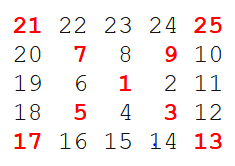

It can be verified that the sum of the numbers on the diagonals is 101.

What is the sum of the numbers on the diagonals in a 1001 by 1001 spiral formed in the same way?

### ANSWER:

We use a 1001 x 1001 2D array, starting with the element at `row` = 501, `col` = 501. We then go in a spiral (right, down, left, up and right, repeatedly). To go right, we add one to `col` and to go left, we subtract one from `col`. To go down, we add one to `row` and to go up, we subtract one to `row`. We use helper functions to execute these movements.

We also need to know the direction we need to go for every number. Note that whenever the number is the square of an odd number, we move one cell to the right. After this, we have to take note of the size of the squares surrounding the center. The first square is a 3x3 square, and we change direction every 3 - 1 = 2 numbers, except for the first downward movement where we change direction after 3 - 2 = 1 number. 

The second square is a 5x5 square, and we change direction every 5 - 1 = 4 numbers, except for the first downward movement where we change direction after 5 - 2 = 3 numbers. We employ the same pattern here, using a variable `sq_size` to track the size of the surrounding square (incrementing by 2 every time, starting at 3) and another variable `n` to determine if the number is the square of an odd number.

After this, we get the sum of the diagonal numbers. To do this, we note that for every diagonal entry, either the row and column numbers are equal or the sum of the row and column numbers is equal to the size - 1. We run through the entire array to check the cells for which this is true and store the sum of the entries in `total`.

In [41]:
def left(matrix, row, col, num):
    col -= 1
    num += 1
    matrix[row][col] = num
    return matrix, row, col, num
    
def right(matrix, row, col, num):
    col += 1
    num += 1
    matrix[row][col] = num
    return matrix, row, col, num

def up(matrix, row, col, num):
    row -= 1
    num += 1
    matrix[row][col] = num
    return matrix, row, col, num

def down(matrix, row, col, num):
    row += 1
    num += 1
    matrix[row][col] = num
    return matrix, row, col, num

In [42]:
def prob_28(size):
    # Initialize array
    spiral= [[[] for j in range(size)] for i in range(size)]
    
    for i in range(size):
        for j in range(size):
            spiral[i][j] = 0
    
    # Start in the middle
    curr_num = 1
    curr_row = size // 2
    curr_col = size // 2
    spiral[curr_row][curr_col] = curr_num
    
    # Start spiral
    sq_size = 3
    n = 1
    while curr_num < size ** 2:    
        # Move right by 1 if number is perfect square of an odd number
        if curr_num == n ** 2:
            spiral, curr_row, curr_col, curr_num = right(spiral, curr_row, curr_col, curr_num)

        # Change direction every sq_size - 1 increments (sq_size - 2 increments for down) in the order down, left, up, right
        else:
            while curr_num != (n + 2) ** 2:
                for iteration in range(sq_size - 2):
                    spiral, curr_row, curr_col, curr_num = down(spiral, curr_row, curr_col, curr_num)
                for iteration in range(sq_size - 1):
                    spiral, curr_row, curr_col, curr_num = left(spiral, curr_row, curr_col, curr_num)
                for iteration in range(sq_size - 1):
                    spiral, curr_row, curr_col, curr_num = up(spiral, curr_row, curr_col, curr_num)
                for iteration in range(sq_size - 1):
                    spiral, curr_row, curr_col, curr_num = right(spiral, curr_row, curr_col, curr_num)
            
            # Update n and sq_size
            n += 2
            sq_size += 2
        
    # Get sum of diagonal entries
    total = 0
    
    for i in range(size):
        for j in range(size):
            if i == j or i + j == size - 1:
                total += spiral[i][j]
    
    return total

In [43]:
print(prob_28(1001))

# Check
print(prob_28(5))

669171001
101


## PROBLEM 29

Consider all integer combinations of $a^{b}$ for $2 \leq a \leq 5$ and $2 \leq b \leq 5$:

If they are then placed in numerical order, with any repeats removed, we get the following sequence of 15 distinct terms:

4, 8, 9, 16, 25, 27, 32, 64, 81, 125, 243, 256, 625, 1024, 3125

How many distinct terms are in the sequence generated by $a^{b}$ for $2 \leq a \leq 100$ and $2 \leq b \leq 100$?

### ANSWER:

As in Problem 5, we want to check the highest possible power below 100 to see if we need to account for perfect squares, cubes, fourths, fifths, etc. Because the smallest possible number in the set is 2, we check the highest possible power we can raise 2 to until we get something as close to (but less than) 100.

After this, we run through all numbers and raise them to exponents from 2 to 100. If it is a perfect square like 4, we only raise it to exponents from 51 to 100, since exponents 2-50 will already be accounted for by $2^{4}$ - $2^{100}$. If it is a perfect cube like 8, we raise it to exponents from 34-100, since exponents 2-33 will already be accounted for by $2^{6} - 2^{99}$. 

In general, for a power of n, we only need to raise it to exponents from 100 // n + 1 to 100, since the previous exponents will already have been accounted for.

In [44]:
def prob_29(limit):
    # Check if we need to account for perfect squares, cubes, fourths, fifths, etc... 
    exp = 2
    exp_list = []
    while 2 ** exp <= limit:
        exp_list.append(exp)
        exp += 1
    
    # Initialize list of terms
    powers = []

    # Run from a = 2 to limit
    for i in range(2, limit + 1):
        # Check if the number is a perfect square/cube/fourth/etc.
        for exp in exp_list[::-1]:         # Reverse list so that we check in reverse order
            if i ** (1 / exp) - int(i ** (1 / exp)) == 0:
                # Get start of range
                n = exp
                start = (limit // n) + 1
                break
        else:
            start = 2
        
        # Run from b = start to limit
        for j in range(start, limit + 1):
            powers.append(i ** j)   
    
    return len(powers)

In [45]:
print(prob_29(100))

# Check
print(prob_29(5))

9361
15


## PROBLEM 30:

Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits: 1634, 8208 and 9474.
  
As $1 = 1^{4}$ is not a sum it is not included.

The sum of these numbers is $1634 + 8208 + 9474 = 19316$.

Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.

### ANSWER:

In [46]:
total = 0
for num in range(1000, 1000000):
    total_digit = 0
    num = str(num)
    for digit in num:
        total_digit += int(digit) ** 5
    if total_digit == int(num):
        total += int(num)
print(total)

443839


## PROBLEM 31:

In the United Kingdom the currency is made up of pound (£) and pence (p). There are eight coins in general circulation:

    1p, 2p, 5p, 10p, 20p, 50p, £1 (100p), and £2 (200p).

It is possible to make £2 in the following way:

    1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p

How many different ways can £2 be made using any number of coins?

### ANSWER:

We start with £2/200p. We want to be able to allocate the 200p to each of the eight categories. 

Let's start with $a$ £1 coins, where $0 \leq a \leq 2$. 

- We could add $b$ 50p coins, where $0 \leq b \leq \frac{200 - 100a}{50}$. 
- We could add $c$ 20p coins, where $0 \leq c \leq \frac{200 - 100a - 50b}{20}$.
- We could add $d$ 10p coins, where $0 \leq d \leq \frac{200 - 100a - 50b - 20c}{10}$.
- We could add $e$ 5p coins, where $0 \leq e \leq \frac{200 - 100a - 50b - 20c - 10d}{5}$.
- We could add $f$ 2p coins, where $0 \leq f \leq \frac{200 - 100a - 50b - 20c - 10d - 5e}{2}$.
- The remainder will go to the 1p coins.

We use a nested for loop to count each of these instances. Note that we didn't account for the £2 itself in this count, so we need to add 1 to whatever we get.

In [47]:
n = 0

for a in range(3):
    for b in range((200 - 100 * a) // 50 + 1):
        for c in range((200 - 100 * a - 50 * b) // 20 + 1):
            for d in range((200 - 100 * a - 50 * b - 20 * c) // 10 + 1):
                for e in range((200 - 100 * a - 50 * b - 20 * c - 10 * d) // 5 + 1):
                    for f in range((200 - 100 * a - 50 * b - 20 * c - 10 * d - 5 * e) // 2 + 1):
                            n += 1


print(n + 1)

73682


## PROBLEM 32:
We shall say that an $n$-digit number is pandigital if it makes use of all the digits 1 to $n$ exactly once; for example, the 5-digit number, $15234$, is 1 through 5 pandigital.

The product 7254 is unusual, as the identity, $39 × 186 = 7254$, containing multiplicand, multiplier, and product is 1 through 9 pandigital.

Find the sum of all products whose multiplicand/multiplier/product identity can be written as a 1 through 9 pandigital.

HINT: Some products can be obtained in more than one way so be sure to only include it once in your sum.

### ANSWER:

We only have to search through the set of all 3-digit numbers whose digits are unique. For every three-digit number, we run through all possible two-digit pairs, check the product and see if the resulting multiplicand/multiplier/product identity can be written as 1 through 9 pandigital. 

In [48]:
def two_digit(lst):
    comb = []

    for i in range(len(list(lst))):
        for j in range(len(list(lst))):
            if lst[i] != lst[j]:
                comb.append(int(lst[i] + lst[j]))

    return comb

In [49]:
total = 0

for i in range(123, 988):
    # Initialize variables
    number_list = list("123456789")     
    
    # Check if digits in three-digit number are unique
    if len(set(list(str(i)))) == 3 and "0" not in list(str(i)):
        # Remove digits in number from number_set
        number_list = [k for k in number_list if k not in list(str(i))]
        
        # Run through all possible two-digit numbers
        for j in two_digit(number_list):
            prod = i * j
            
            # Update number_list
            number_list_2 = [k for k in number_list if k not in list(str(j))]
            prod_numbers = list(str(prod)) 
            
            # Check if pandigital
            if len(prod_numbers) == 4:
                if set(prod_numbers) == set(number_list_2):
                    total += prod
                    
print(total)

41566


## PROBLEM 33:

The fraction $\frac{49}{98}$ is a curious fraction, as an inexperienced mathematician in attempting to simplify it may incorrectly believe that $\frac{49}{98}$ = $\frac{4}{8}$, which is correct, is obtained by cancelling the 9s.

We shall consider fractions like, $\frac{30}{50}$ = $\frac{3}{5}$, to be trivial examples.

There are exactly four non-trivial examples of this type of fraction, less than one in value, and containing two digits in the numerator and denominator.

If the product of these four fractions is given in its lowest common terms, find the value of the denominator.

### ANSWER:

We will make use of the `gcd` function from earlier to create a helper function `simplify_frac`. Since the fractions contain two-digit numerators and denominators, our search space is limited to the range from 10-99. We run through all possible numerators and denominators, check if they have similar digits (except when the similar digit is "0", as in the case of the trivial example), simplify them using the helper function and check if the simplified version is similar to that obtained when we just cancel the similar digits.

In [50]:
def simplify_frac(num, denom):
    return num // gcd(num, denom), denom // gcd(num, denom)

def simplify_cancel(num, denom):
    # Check if there are similar digits that are nonzero
    if num != denom:
        similar_set = set(list(str(num))).intersection(set(list(str(denom))))
                
        if similar_set != set() and '0' not in similar_set:
            similar_digit = list(similar_set)[0]
        
            # Simplify by cancellation
            num = int(str(num).replace(str(similar_digit), "", 1))
            denom = int(str(denom).replace(str(similar_digit), "", 1))
        
            return num, denom
        
        else:
            return 1, 0   # Return arbitrary num-denom combination if simplify_cancel cannot be performed on the fraction
    
    else:
        return 1, 0   # Return arbitrary num-denom combination if simplify_cancel cannot be performed on the fraction

In [51]:
# Initialize variables
product_num = 1
product_denom = 1

# Run through all possible numerators and denominators
for num in range(10, 100):
    for denom in range(10, 100):
        cancelled = simplify_cancel(num, denom)
        # Check if simplifying through cancelling yields the same result
        if simplify_frac(cancelled[0], cancelled[1]) == simplify_frac(num, denom):
            # Consider only when num < denom
            if num < denom:
                product_num *= num
                product_denom *= denom

# Simplify product
product_num, product_denom = simplify_frac(product_num, product_denom)
print(product_denom)

100


## PROBLEM 34:

145 is a curious number, as $1! + 4! + 5! = 1 + 24 + 120 = 145$.

Find the sum of all numbers which are equal to the sum of the factorial of their digits.

Note: as $1! = 1$ and $2! = 2$ are not sums they are not included.

### ANSWER:

The solution is fairly straightforward and will make use of the `factorial` function from earlier.

In [52]:
total_curious = 0
for num in range(3, 100000):
    # Initialize variables
    total = 0
    
    # Convert number to string
    num = str(num)
    
    # Get sum of factorials of all digits
    for digit in num:
        total += factorial(int(digit))
    
    if int(num) == total:
        total_curious += int(num)

print(total_curious)

40730


## PROBLEM 35
The number, 197, is called a circular prime because all rotations of the digits: 197, 971, and 719, are themselves prime.

There are thirteen such primes below 100: 2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, and 97.

How many circular primes are there below one million?

### ANSWER:

We use a helper function `get_rotations` to get all possible digit rotations for every number. We then use the function `generate_primes` to generate all primes below a certain number (in our case, 1,000,000). We then check if each prime is circular or not. 

In [53]:
def get_rotations(num):
    # Initialize variables
    rotations = []
    
    # Convert num to string
    num = str(num)
    
    # Obtain all possible digit rotations
    for iteration in range(len(num)):
        num = num[1:] + num[0]
        rotations.append(int(num))
    
    return rotations

In [54]:
def generate_primes(limit):
    # Initialize variables
    prime = [True for i in range(limit)]
    p = 2
    
    # Set values for 0, 1 and 2
    prime[0] = False
    prime[1] = False
    prime[2] = True
    
    # Implement sieve of Eratosthenes.
    while p ** 2 <= limit:
        
        # If p is prime
        if prime[p]:
            # Starting from p**2 in increments of p
            for i in range(p ** 2, limit, p):
                prime[i] = False
        
        # Update p
        p += 1
    
    return [idx for idx, val in enumerate(prime) if val]

In [55]:
def prob_35(limit):
    # Initialize variables
    count_circular = 0
    
    # Generate all primes below limit
    primes = generate_primes(limit)
    
    # Run through all primes
    for prime in primes:
        # Initialize variables
        flag = 0     # 1 if not a circular prime, 0 otherwise
        
        # If prime contains an even number, it is not circular
        if set(list(str(prime))).intersection(set(["2", "4", "6", "8", "0"])) != set() and len(str(prime)) >= 2:
            flag = 1
        else:
            # If prime contains a non-prime rotation, it is not circular
            for rotation in get_rotations(prime):
                if rotation not in primes:
                    flag = 1
                    break
        
        # If flag = 0, add to circular prime count
        if flag == 0:
            count_circular += 1

    return count_circular

In [56]:
print(prob_35(1000000))

# Check
print(prob_35(100))

55
13


## PROBLEM 36:

The decimal number, $585 = 1001001001_{2}$ (binary), is palindromic in both bases.

Find the sum of all numbers, less than one million, which are palindromic in base 10 and base 2.

(Please note that the palindromic number, in either base, may not include leading zeros.)

### ANSWER:

In this case, we need a function `decimal_to_binary` to convert decimal numbers to binary numbers. We run through all numbers less than one million and check first if the number is palindromic. After this, we convert it using our helper function and then check if its equivalent in binary is also palindromic. 

In [57]:
def decimal_to_binary(num):
    # Initialize variable
    binary = ""
    
    # Successively divide the number by 2 until . Take the remainder and add it onto binary 
    while num != 0:
        binary = str(num % 2) + binary
        num //= 2
        
    return int(binary)

In [58]:
def prob_36(limit):
    # Initialize variables
    total = 0
    
    # Run through all numbers up to limit
    for num in range(11, limit):
        
        # Check if number is palindromic in decimal
        if str(num) == str(num)[::-1]:
            
            # Convert to binary and check if number is palindromic in binary
            binary = decimal_to_binary(num)
            if str(binary) == str(binary)[::-1]:
                total += num
    return total

In [59]:
prob_36(1000000)

872162

## PROBLEM 37:
The number 3797 has an interesting property. Being prime itself, it is possible to continuously remove digits from left to right, and remain prime at each stage: 3797, 797, 97, and 7. Similarly we can work from right to left: 3797, 379, 37, and 3.

Find the sum of the only eleven primes that are both truncatable from left to right and right to left.

NOTE: 2, 3, 5, and 7 are not considered to be truncatable primes.

### ANSWER:

We first check if the digit itself (when untruncated) is prime. Afterwards, we truncate the number successively and check whether the number is prime, using our `is_prime` function from earlier. If the number remains prime after all possible left/right truncations, it is truncatable.

In [60]:
# Initialize variables
limit = 800000
odd_digits = set("13579")
total = 0

for num in range(11, limit):
    flag = 1   # 0 if non-truncatable and 1 otherwise
    str_num = str(num)
    
    # Check if all digits are odd and if the number itself is prime
    if is_prime(num):
        # Check left and right truncations simultaneously
        for i in range(1, len(str_num)):
            if not is_prime(int(str_num[i:])) or not is_prime(int(str_num[:i])):
                flag = 0
                break            
    
    else:
        flag = 0
        
    if flag == 1:
        print(num)
        total += num
        
print("total: ", total)

37
53
73
313
317
373
797
3137
3797
739397
total:  748294


## PROBLEM 38:
Take the number 192 and multiply it by each of 1, 2, and 3:

    192 × 1 = 192
    192 × 2 = 384
    192 × 3 = 576

By concatenating each product we get the 1 to 9 pandigital, 192384576. We will call 192384576 the concatenated product of 192 and (1,2,3)

The same can be achieved by starting with 9 and multiplying by 1, 2, 3, 4, and 5, giving the pandigital, 918273645, which is the concatenated product of 9 and (1,2,3,4,5).

What is the largest 1 to 9 pandigital 9-digit number that can be formed as the concatenated product of an integer with (1,2, ... , $n$) where $n$ > 1?

### ANSWER:

We need to search through all numbers such that if we multiply it with 1, 2, ... n and concatenate the results, we get a 9-digit number.

For one-digit numbers, for example, the concatenated products of the numbers 5 to 9 with (1, 2, 3, 4, 5) result in 9-digit numbers. The same is true for the numbers 25 to 33 with (1, 2, 3, 4) and 100 to 333 with (1, 2, 3). For each one, we get the concatenated products and then check if the result is pandigital. We then keep the largest pandigital number out of the concatenated products.

In [61]:
# Initialize variables
numbers = [(5, 10), (25, 34), (100, 334)]
ranges = [[1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3]]
max_pandigital = 0
case = 0

while case <= 2:
    i, j = numbers[case]
    for k in range(i, j):
        product = ""

        # Get concatenated product
        for l in ranges[case]:
            product += str(k * l)
            
        
        # Check if resulting product is pandigital
        if set(product) == set("123456789"):

            # Check if product > max_pandigital
            if int(product) > max_pandigital:
                max_pandigital = int(product)
        
    # Update case
    case += 1
        
print(max_pandigital)

918273645


## PROBLEM 39:
If $p$ is the perimeter of a right angle triangle with integral length sides ${a,b,c}$, there are exactly three solutions for p = 120: {20,48,52}, {24,45,51}, {30,40,50}

For which value of $p ≤ 1000$, is the number of solutions maximised?

### ANSWER:

Say $p = a + b + c$, where $c = \sqrt{a^{2} + b^{2}}$. We assume in this case that $a \leq b$.

Using some algebra, we find that $b = \frac{2ap - p^{2}}{2a - 2p}$.

Thus, for every value of $p$, if we are able to find a value of $a$ such that $b$ is an integer (i.e., the absolute value of the denominator perfectly divides the absolute value of the numerator), we have a possible solution.

i.e., For 120, if $a = 20$ so that $|2(20) - 2(120)| = 200$ perfectly divides $|2(20)(120) - (120)^{2}| = 9,600$, we will have an integral and b and $a = 20$ is a possible solution.

To limit our search space, we note that $1 \leq a \leq b$ is at most equal to $b$. When this is the case, $a = \frac{p}{2 + \sqrt{2}}$, so we will only search for values of $a$ within that range.

Moreover, the smallest Pythagorean triple is (3, 4, 5), so we start with $p = 12$. It is also worth noting that p must always be even, as shown below.

- If a and b are odd, their squares must be both odd, so c (the square root of the sum of their squares) must be even. Since a is odd, b is odd and c is even, p must be even.

- If a is odd and b is even, their squares must be odd and even, respectively, so c (the square root of the sum of their squares) must be odd. Since a is odd, b is even and c is odd, p must be even.

- If a and b are even, their squares must be both even, so c (the square root of the sum of their squares) must be even. Since a, b and c are all even, p must be even

In [62]:
max_sol = 0
max_p = 0

# Run through p
for p in range(12, 1000, 2):
    sol = 0
    
    # Run through a
    for a in range(1, int(p / (2 + 2 ** (1/2)))):
        
        # Check divisibility condition from earlier
        if abs(2 * a * p - p ** 2) % abs(2 * a - 2 * p) == 0:
            sol += 1
    
    if sol > max_sol:
        max_sol = sol
        max_p = p

print(max_p)

840


## PROBLEM 40

An irrational decimal fraction is created by concatenating the positive integers 0.123456789101112131415161718192021...

It can be seen that the 12th digit of the fractional part is 1.

If $d_{n}$ represents the nth digit of the fractional part, find the value of $d_{1} × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$.

### ANSWER:

In [63]:
# Initialize variables
frac = ""
num = 1
pos = 1
prod = 1

# Add integers to frac until length is 1,000,000
while len(frac) < 1000000:
    frac += str(num)
    num += 1

# Get product
while pos <= 1000000:
    prod *= int(frac[pos - 1])
    pos *= 10

print(prod)

210


## PROBLEM 42:



The nth term of the sequence of triangle numbers is given by, $t_{n} = \frac{1}{2}n(n+1)$; so the first ten triangle numbers are:

1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

By converting each letter in a word to a number corresponding to its alphabetical position and adding these values we form a word value. For example, the word value for SKY is $19 + 11 + 25 = 55 = t_{10}$. If the word value is a triangle number then we shall call the word a triangle word.

Using words.txt, a 16K text file containing nearly two-thousand common English words, how many are triangle words?

### ANSWER:

To find out if a given number is triangular, we use algebra to determine $t_{n}$ in terms of $n$. In doing so, we find that $n = \frac{\sqrt{8t_{n} + 1} - 1}{2}$. Since $n$ must be an integer, we can check if some number $k$ is triangular if $n = \frac{\sqrt{8k + 1} - 1}{2}$ is integral. Simplifying this condition further, $\sqrt{8k + 1} - 1$ must be even, which means that $\sqrt{8k + 1}$ must be odd, which means that $8k + 1$ must be a perfect odd square.

In [64]:
def is_triangular(num):
    if (8 * num + 1) ** (1 / 2) - int((8 * num + 1) ** (1 / 2)) == 0 and (8 * num + 1) % 2 != 0:
        return True
    return False

In [65]:
# Initialize variables
alphabet = ",ABCDEFGHIJKLMNOPQRSTUVWXYZ" # Add "," so that alphabet[1] = 'A'
count = 0

# Open file
f = open("Problem 42.txt", "r")
word_list = f.readline()

# Separate names
word_list = word_list.split('"')

# Remove punctuation
word_list = list(filter(lambda x: x != "," and x != "", word_list)) 

# Get score for each word
for word in word_list:
    # Initialize variables
    score = 0
    
    # Get alphabetical value for each name
    for letter in word:
        score += alphabet.find(letter)
    
    # Check if word is triangular
    if is_triangular(score):
        count += 1

print(count)

162
